# Prerequisites

In [1]:
import sys

sys.path.append("..")

In [2]:
%load_ext autoreload
%autoreload 2
import json
import os
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

# Load stats

In [3]:
m_dir = "../models/hw-checkpoints/run-20240507-083803"

with open(f"{m_dir}/config.json", "r") as f:
    config = json.load(f)

stats = pd.read_csv(f"{m_dir}/stats.csv", index_col=0)
stats.head()

,train/mean_loss_total_a,train/mean_loss_ce_a,train/mean_loss_features_a,train/accuracy_a,val/mean_loss_total_a,val/mean_loss_ce_a,val/mean_loss_features_a,val/accuracy_a,val/mean_obj_score_a,param/lr_a,...,train/mean_loss_total_c,train/mean_loss_ce_c,train/mean_loss_features_c,train/accuracy_c,val/mean_loss_total_c,val/mean_loss_ce_c,val/mean_loss_features_c,val/accuracy_c,val/mean_obj_score_c,param/lr_c
0,0.866802,0.696207,0.170595,0.580472,1.062976,0.688372,0.374604,0.61,0.572306,0.0001,...,0.919849,0.744970,0.174879,0.522532,0.893902,0.656842,0.237059,0.58,0.579695,0.0001
1,0.777156,0.637212,0.139944,0.642704,0.909220,0.597117,0.312103,0.72,0.579890,0.0001,...,0.840899,0.693139,0.147760,0.590129,1.248565,0.953890,0.294675,0.51,0.650430,0.0001
2,0.716686,0.594969,0.121717,0.687768,0.901982,0.598485,0.303496,0.65,0.581137,0.0001,...,0.774834,0.660800,0.114034,0.648069,0.817983,0.573933,0.244050,0.72,0.711206,0.0001
3,0.682424,0.581156,0.101268,0.689914,1.148857,0.867798,0.281059,0.59,0.576968,0.0001,...,0.712695,0.619838,0.092857,0.673820,0.764347,0.585816,0.178531,0.69,0.713668,0.0001
4,0.678732,0.583258,0.095474,0.697425,1.135605,0.951006,0.184599,0.56,0.590152,0.0001,...,0.639319,0.555319,0.084000,0.728541,4.154678,3.743903,0.410775,0.51,0.833344,0.0001


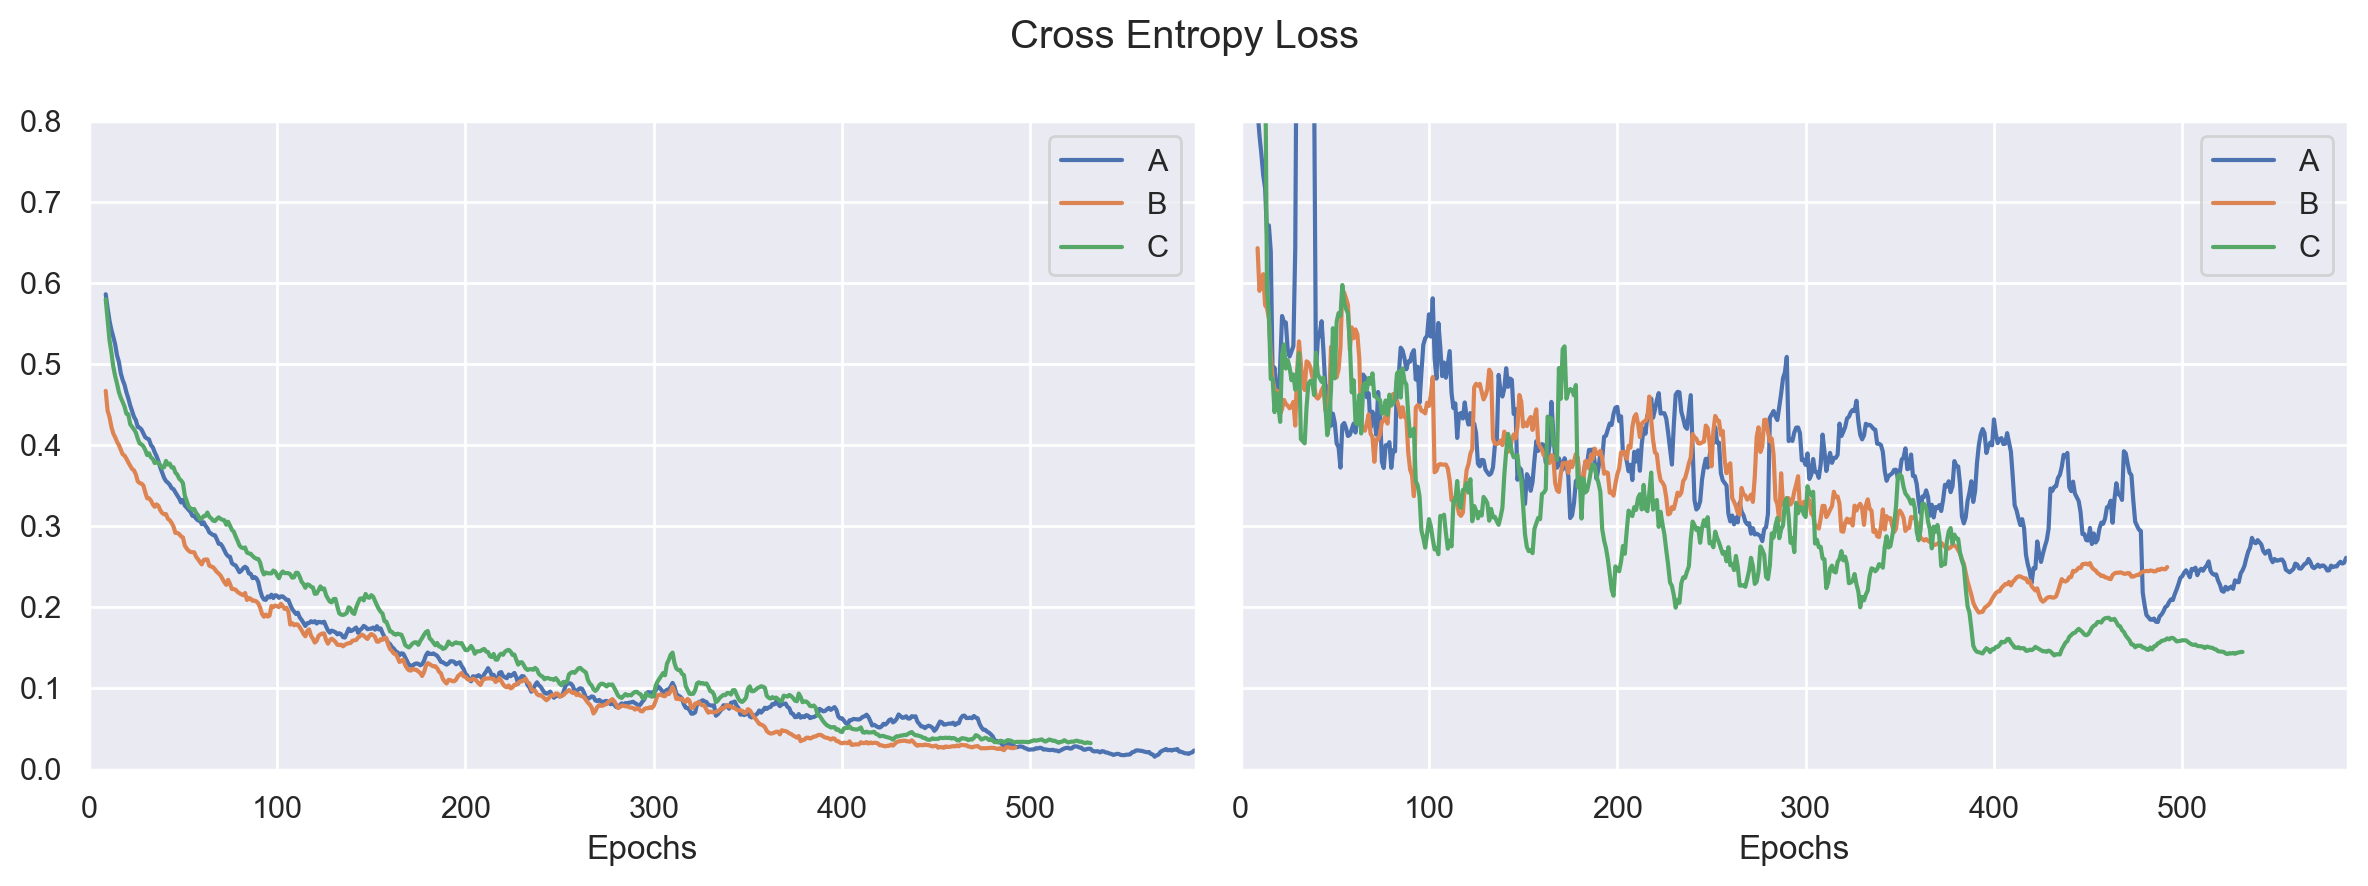

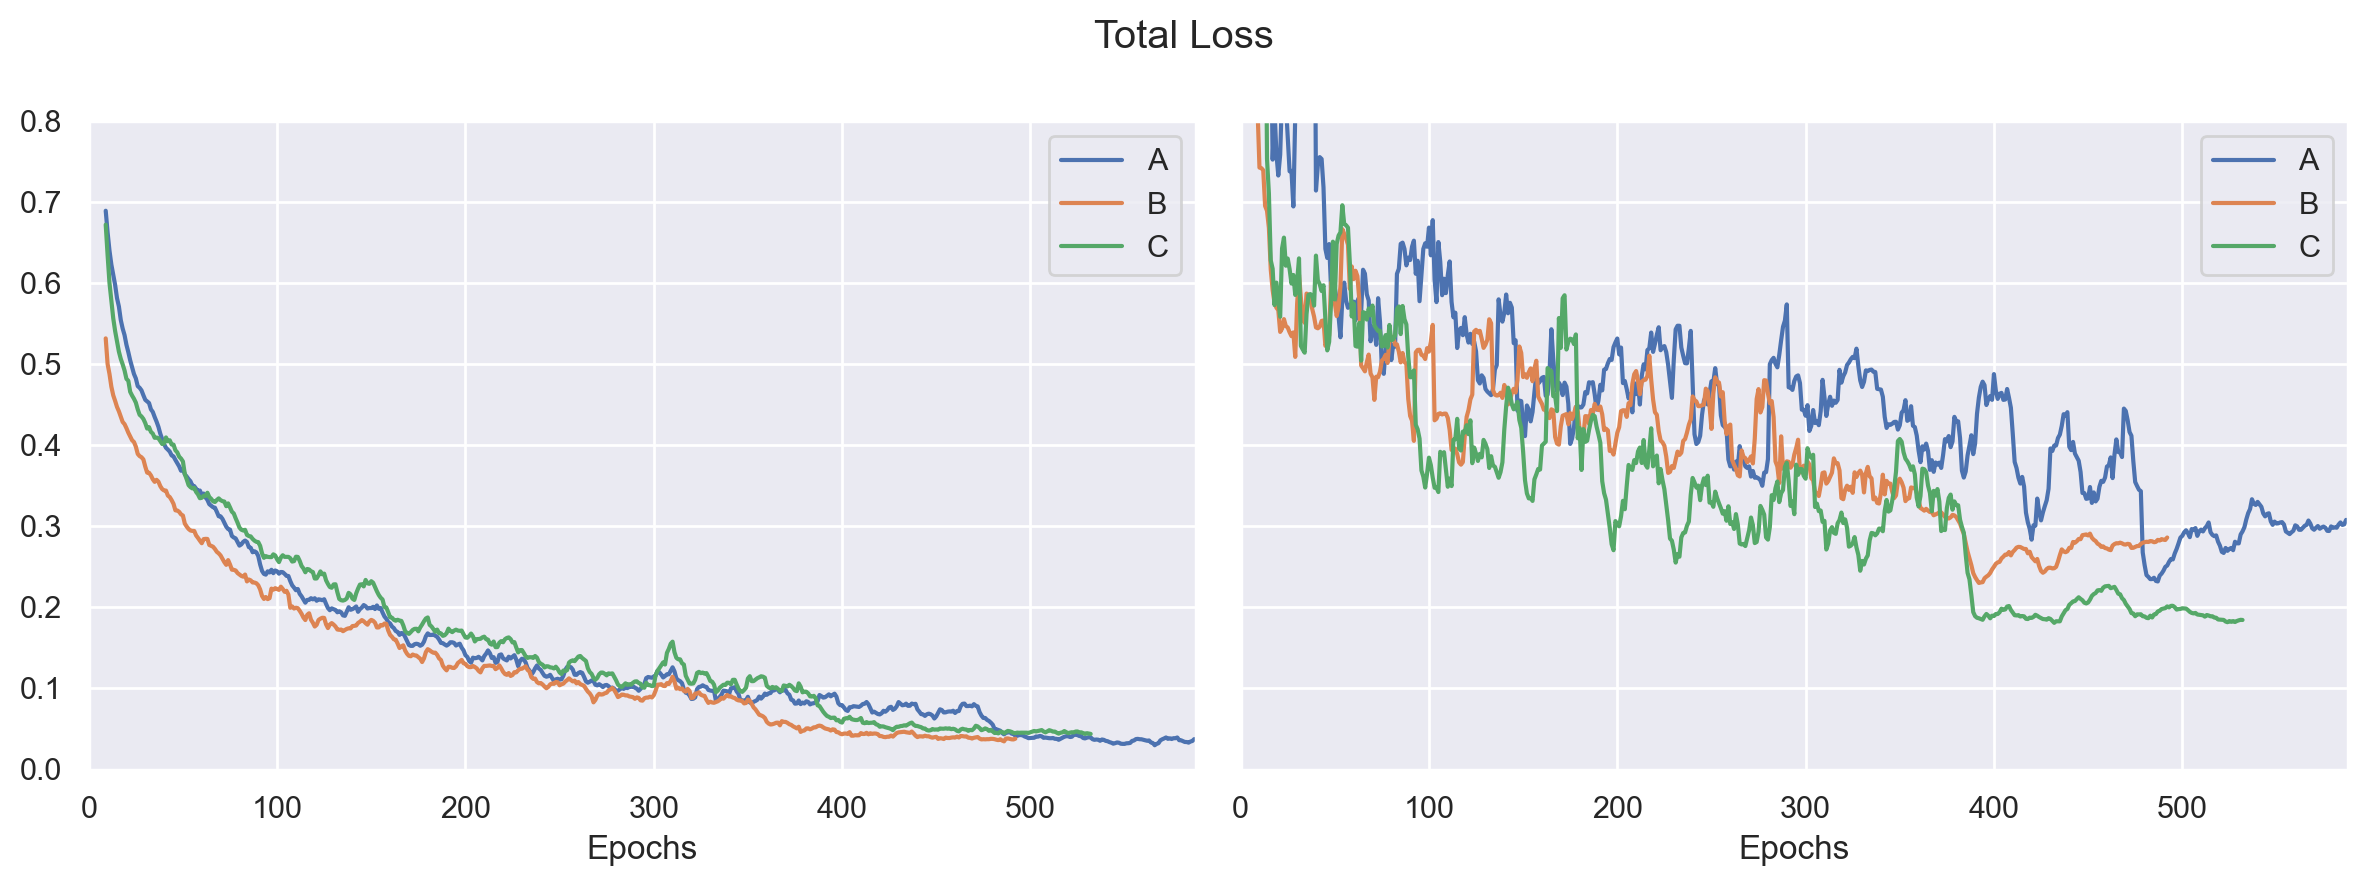

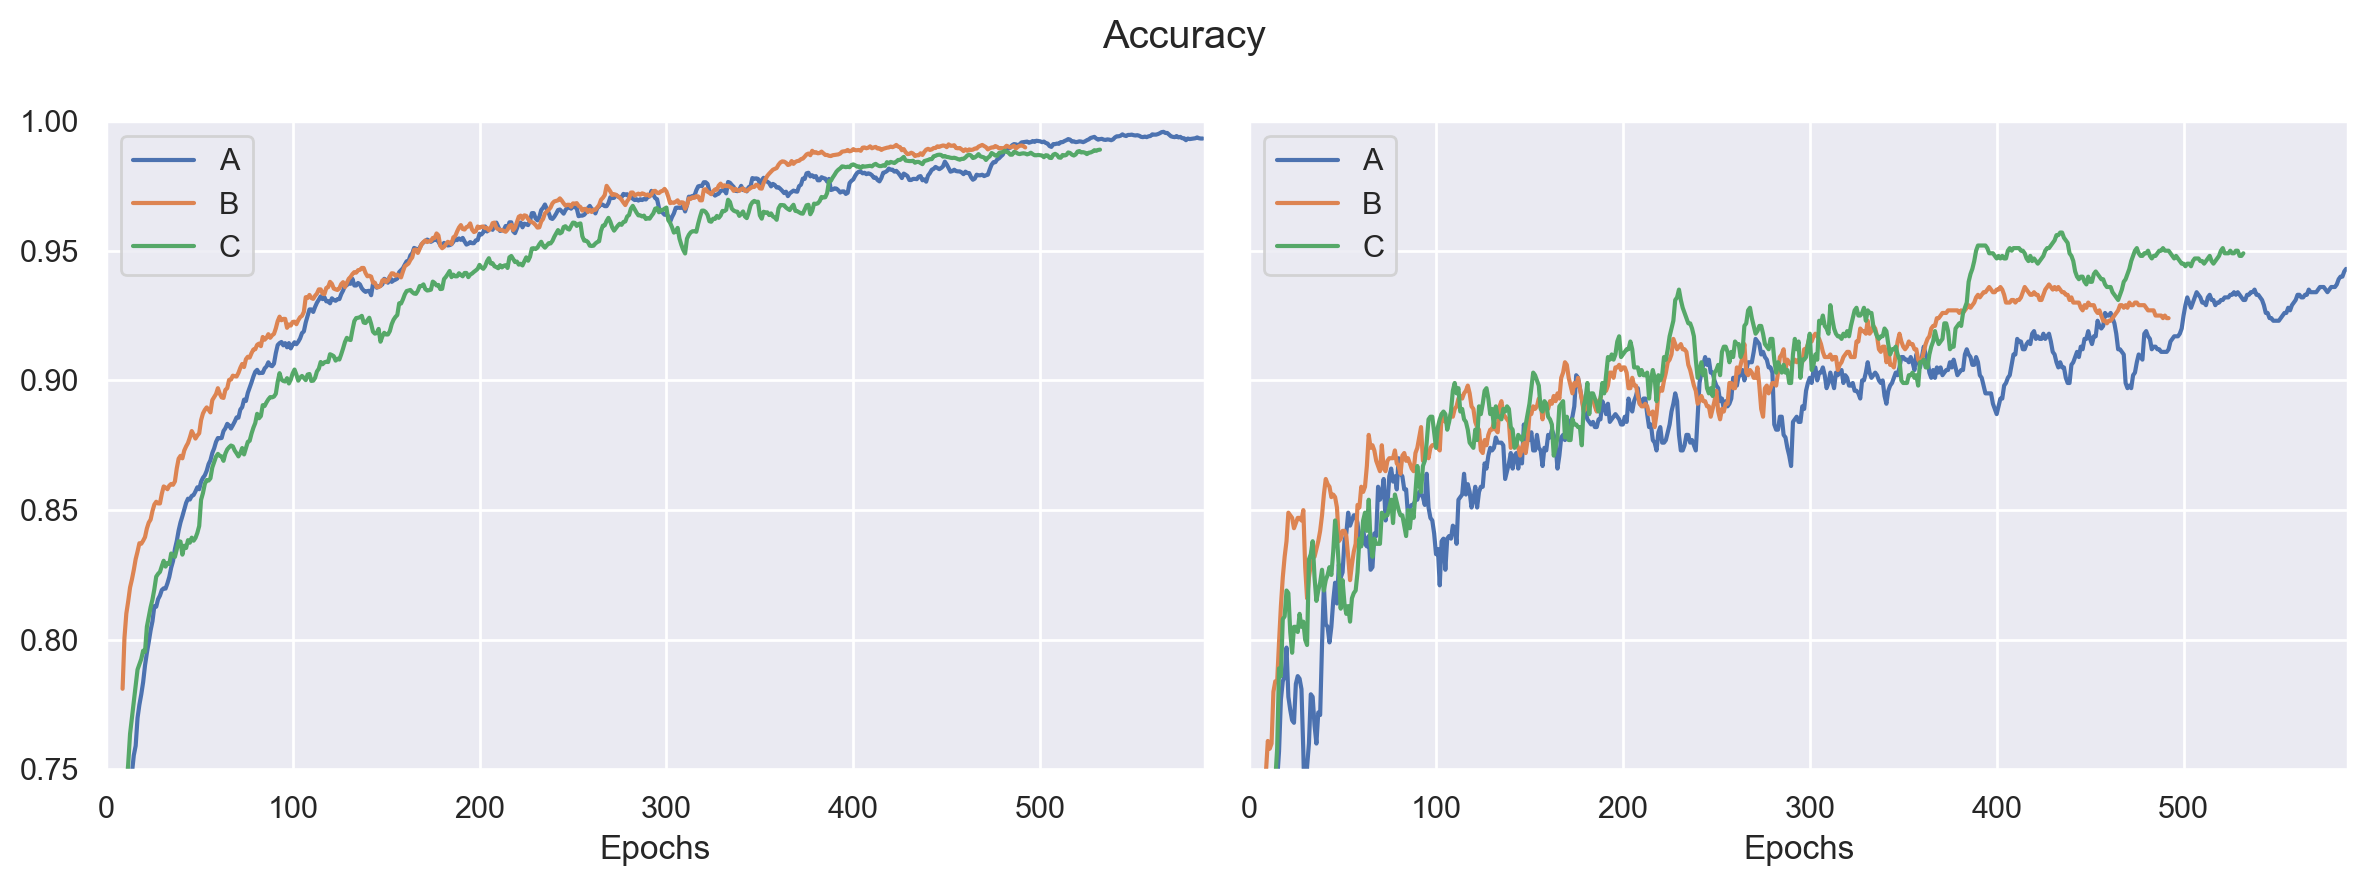

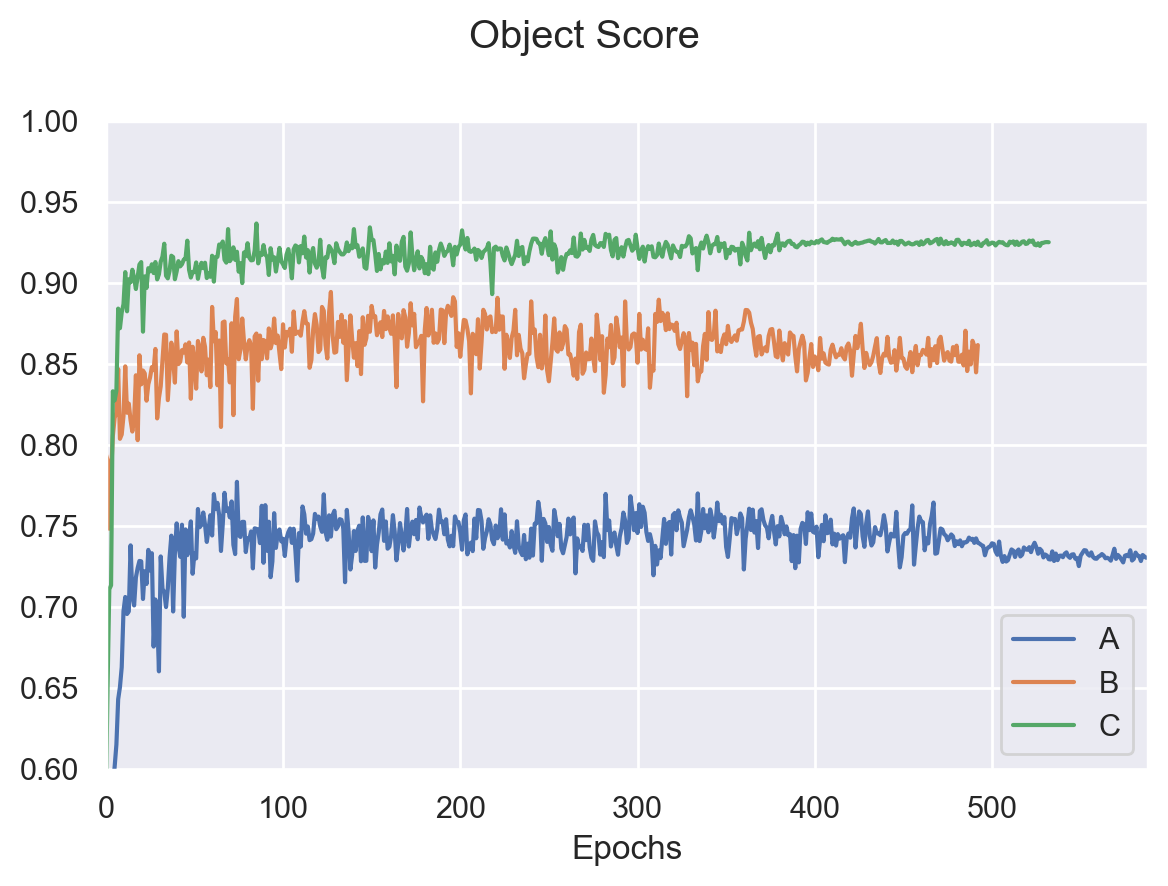

In [58]:
stat_params = {
    'mean_loss_ce': {
        'title': 'Cross Entropy Loss',
        'splits': ('train', 'val'),
        'ylim': (0, .8),
        'window': 10,
    },
    'mean_loss_total': {
        'title': 'Total Loss',
        'splits': ('train', 'val'),
        'ylim': (0, .8),
        'window': 10,
    },
    'accuracy': {
        'title': 'Accuracy',
        'splits': ('train', 'val'),
        'ylim': (0.75, 1.0),
        'window': 10,
    },
    'mean_obj_score': {
        'title': 'Object Score',
        'splits': ('val', ),
        'ylim': (0.6, 1.0),
        'window': 1,
    },
}
models = 'abc'
w, h = 4, 3
s = 1.5
xlabel = 'Epochs'
for stat, params in stat_params.items():
    splits = params['splits']
    
    fig, axs = plt.subplots(1, len(splits), sharey=True, figsize=(w*s*len(splits), h*s), dpi=200, tight_layout=True)
    if len(splits) == 1:
        axs = (axs, )
    fig.suptitle(params['title'])
    for split, ax in zip(splits, axs): 
        stats[[f'{split}/{stat}_{m}' for m in models]].rolling(window=params['window']).mean().plot(ax=ax, legend=False)
        ax.legend(models.upper())
        ax.set_xlim(0, len(stats))
        ax.set_ylim(*params['ylim'])
        ax.set_xlabel(xlabel)
    plt.show()